# **Spaceship Titanic**

**Members**
1. Nutnaree Buaphad  (6309658232)
1. Chanisara Tanoueng  (6309658737)
1. Ratchanok Prakhammin  (6309658778)
1. Krittapas Bunkrapue  (6309658869)
1. Thananat Jiramongkonphat  (6309659016)
1. Wattanachat Kueapara  (6309659164)

# **Import Library และ Datasets**

In [1]:
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df_train = pd.read_csv(r"C:\Users\Lokesh\Downloads\train.csv")
df_test = pd.read_csv(r"C:\Users\Lokesh\Downloads\test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**ทำการรวม Dataset train และ test**

In [4]:
df_train['Train'] = 'Yes'
df_test['Train'] = 'No'

In [5]:
concat = pd.concat([df_train, df_test])
concat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Train
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No


# **EDA (Exploratory Data Analysis)**

สำรวจข้อมูลเบื้องต้น

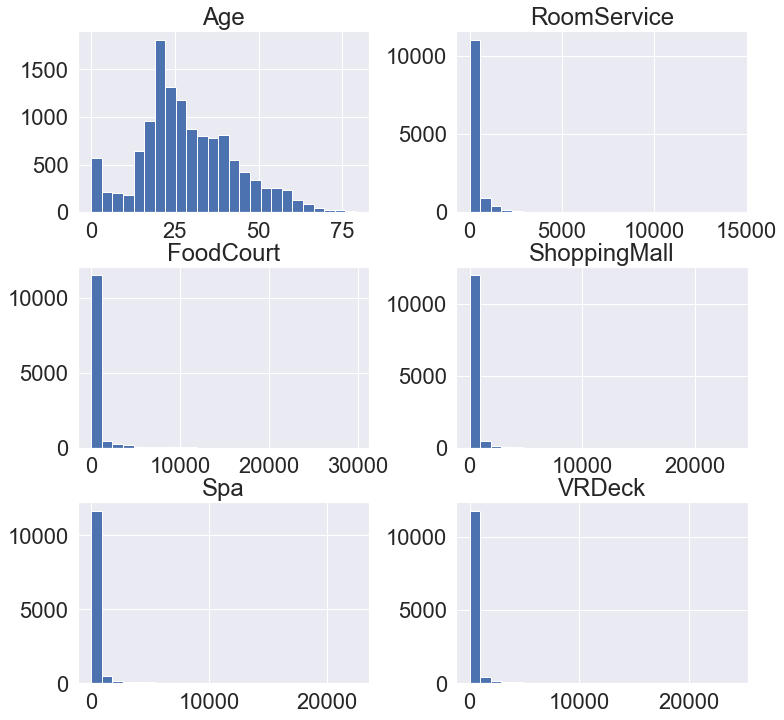

In [6]:
concat.hist(bins = 25, figsize = (12, 12))
plt.show()

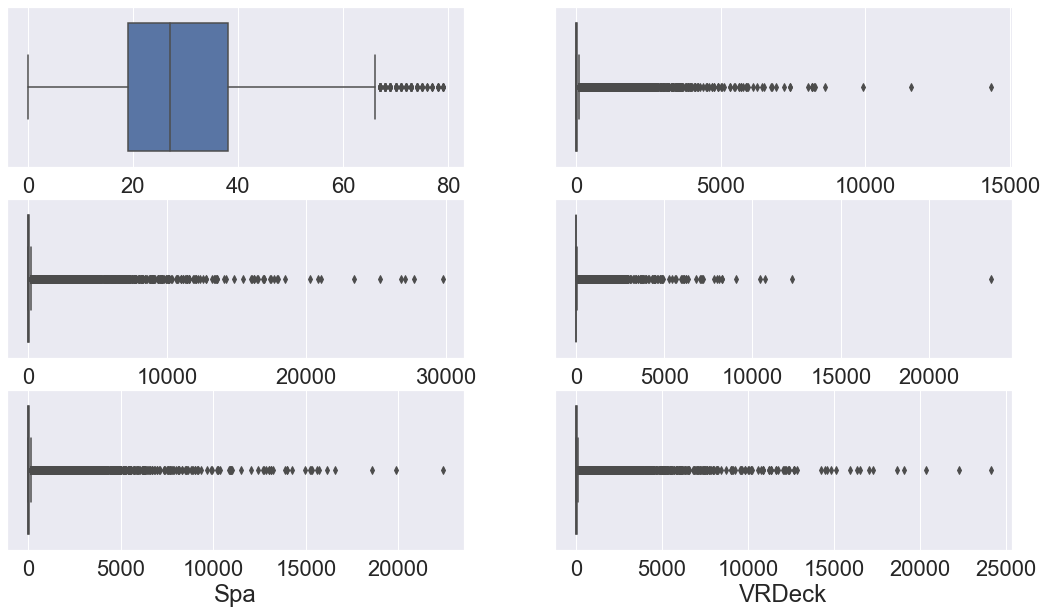

In [7]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]
q, r =divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.boxplot(data=concat, x=columns[i], ax=ax[q, r])
plt.show()

# **Feature engineering**

# Imputation

ตรวจสอบจำนวนข้อมูลที่หายไป

In [8]:
concat.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Train              0
dtype: int64

**Missing Data (Numerical)**

เติมข้อมูลที่หายไปด้วยค่ามัธยฐาน

In [9]:
concat[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].median()

Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [10]:
concat[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = concat[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [11]:
concat['Age'] = concat['Age'].fillna(concat['Age'].median())

**Missing Data (Categorical)**

เติมข้อมูลที่หายไปด้วยข้อมูลที่เป็นฐานนิยม

In [12]:
concat['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [13]:
concat['VIP'] = concat['VIP'].fillna(False)

In [14]:
concat['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [15]:
concat['HomePlanet'] = concat['HomePlanet'].fillna('Mars')

In [16]:
concat['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [17]:
concat['Destination'] = concat['Destination'].fillna("'TRAPPIST-1e")

In [18]:
concat['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [19]:
concat['CryoSleep'] = concat['CryoSleep'].fillna(False)

แยกคอลัมน์ Cabin ออกเป็น Deck, Num และ Side

In [20]:
concat[['Deck', 'Num', 'Side']] = concat['Cabin'].str.split('/', expand=True)
concat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Train,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No,D,296,P
4275,9273_01,Europa,False,D/297/P,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No,D,297,P


In [21]:
concat['Deck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64

In [22]:
concat['Deck'] = concat['Deck'].fillna('T')

In [23]:
concat['Num'].value_counts()

82      34
4       28
56      28
95      27
31      27
        ..
1848     1
1847     1
1846     1
1844     1
1890     1
Name: Num, Length: 1894, dtype: int64

In [24]:
concat['Num'] = concat['Num'].fillna('0')

In [25]:
concat['Side'].value_counts()

S    6381
P    6290
Name: Side, dtype: int64

In [26]:
concat['Side'] = concat['Side'].fillna('P')

สร้างคอลัมน์ Sum_spend โดยนำข้อมูลค่าใช้จ่ายของบริการแต่ละประเภทมารวมกัน

In [27]:
concat['Sum_spend'] = concat['RoomService'] + concat['FoodCourt'] + concat['ShoppingMall'] + concat['Spa'] + concat['VRDeck']
concat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Train,Deck,Num,Side,Sum_spend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No,G,1496,S,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No,T,0,P,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No,D,296,P,0.0
4275,9273_01,Europa,False,D/297/P,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No,D,297,P,3203.0


สร้างคอลัมน์ AgeGroup โดยแบ่งกลุ่มอายุตามช่วงอายุในคอลัมน์ Age

In [28]:
concat['AgeGroup'] = pd.cut(concat.Age, bins=[-1, 5, 13, 18, 60, 100], labels = ['Baby', 'Child', 'Teen', 'Adult', 'Elderly'])
concat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Train,Deck,Num,Side,Sum_spend,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Yes,B,0,P,0.0,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Yes,F,0,S,736.0,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Yes,A,0,S,10383.0,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Yes,A,0,S,5176.0,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Yes,F,1,S,1091.0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,No,G,1496,S,0.0,Adult
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,No,T,0,P,1018.0,Adult
4274,9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,No,D,296,P,0.0,Adult
4275,9273_01,Europa,False,D/297/P,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,No,D,297,P,3203.0,Adult


นำคอลัมน์ Name และ Cabin ซึ่งเป็นคอลัมน์ที่ไม่จำเป็นออก

In [29]:
concat = concat.drop(['Name', 'Cabin'],axis=1)
concat

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Train,Deck,Num,Side,Sum_spend,AgeGroup
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Yes,B,0,P,0.0,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Yes,F,0,S,736.0,Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Yes,A,0,S,10383.0,Adult
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Yes,A,0,S,5176.0,Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Yes,F,1,S,1091.0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,No,G,1496,S,0.0,Adult
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,No,T,0,P,1018.0,Adult
4274,9271_01,Mars,True,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,NaN,No,D,296,P,0.0,Adult
4275,9273_01,Europa,False,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,NaN,No,D,297,P,3203.0,Adult


In [30]:
concat.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
Train              0
Deck               0
Num                0
Side               0
Sum_spend          0
AgeGroup           0
dtype: int64

# Label Encoding

แปลงข้อมูลในคอลัมน์ HomePlanet, CryoSleep, Destination, VIP, Deck, Side, Num, AgeGroup ให้อยู่ในรูปของตัวเลข

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num', 'AgeGroup']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr = np.array(concat[i]).astype(str)
    le.fit(arr)
    concat[i]=le.transform(concat[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num
AgeGroup


In [32]:
concat.set_index('PassengerId',inplace=True)

In [33]:
concat.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Train,Deck,Num,Side,Sum_spend,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,
0001_01,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False,Yes,1,0,0,0.0,0
0002_01,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True,Yes,5,0,1,736.0,0
0003_01,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,Yes,0,0,1,10383.0,0
0003_02,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,Yes,0,0,1,5176.0,0
0004_01,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True,Yes,5,1,1,1091.0,4


แยก Dataset trian และ test

In [34]:
df_train = concat[concat['Train'] == 'Yes']
df_train.drop('Train', axis=1, inplace=True)
df_train

C:\Users\Lokesh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum_spend,AgeGroup
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0.0,0
0002_01,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1,736.0,0
0003_01,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,10383.0,0
0003_02,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,5176.0,0
0004_01,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1091.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,1872,0,8536.0,0
9278_01,0,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,556,1,0.0,4
9279_01,0,0,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,559,1,1873.0,0


In [35]:
df_test = concat[concat['Train'] == 'No']
df_test.drop('Train', axis=1, inplace=True)
df_test

C:\Users\Lokesh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum_spend,AgeGroup
PassengerId,,,,,,,,,,,,,,,,
0013_01,0,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,6,1117,1,0.0,0
0018_01,0,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,NaN,5,1228,1,2832.0,0
0019_01,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,NaN,2,0,1,0.0,0
0021_01,1,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,NaN,2,1,1,7418.0,0
0023_01,0,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0,NaN,5,1339,1,645.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0,1,3,34.0,0,0.0,0.0,0.0,0.0,0.0,NaN,6,553,1,0.0,0
9269_01,0,0,3,42.0,0,0.0,847.0,17.0,10.0,144.0,NaN,7,0,0,1018.0,0
9271_01,2,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,3,1113,0,0.0,0


แปลงข้อมูลในคอลัมน์ Transported ให้อยู่ในรูปของตัวเลข

In [36]:
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})
df_train

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_12244/2926226277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Transported']=df_train['Transported'].replace({True:1,False:0})


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum_spend,AgeGroup
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0,0
0002_01,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,736.0,0
0003_01,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,10383.0,0
0003_02,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,5176.0,0
0004_01,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1091.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1872,0,8536.0,0
9278_01,0,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,556,1,0.0,4
9279_01,0,0,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,559,1,1873.0,0


แบ่งชุดข้อมูลเป็นสองส่วนประกอบด้วยชุดข้อมูล X และ y โดยที่ชุดข้อมูล y เป็นคอลัมน์ transported

In [37]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [38]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'Sum_spend', 'AgeGroup'],
      dtype='object')

แบ่งชุดข้อมูลออกเป็น X_train, X_val, y_train และ y_val

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model selection**

In [40]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=1500,
                         eval_metric='Accuracy',
                        verbose=0)

In [41]:
cat.fit(X_train,y_train)

In [42]:
pred = cat.predict(X_train)
pred_y = cat.predict(X_val)

วัดผลประสิทธิภาพโมเดลด้วยค่า Accuracy

In [43]:
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8800690250215704
0.8142610695802185


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)

In [45]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=250, random_state=1)

In [46]:
pred=gb.predict(X_train)
pred_y=gb.predict(X_val)

วัดผลประสิทธิภาพโมเดลด้วยค่า Accuracy

In [47]:
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.860368133448375
0.8021851638872916


เลือกใช้ Model Catboost Classifier

In [48]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)

In [49]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000222FCA30DF0>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [50]:
pred=gcv.predict(X_train)
pred_y=gcv.predict(X_val)

วัดผลประสิทธิภาพโมเดลด้วยค่า Accuracy

In [51]:
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8738855335058959
0.8142610695802185


In [52]:
gcv.fit(X,y)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000222FCA30DF0>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [53]:
y_pred = gcv.predict(df_test)

# **Submission**

In [54]:
sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)
sub.reset_index(inplace=True)
sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [55]:
sub.to_csv('submission2.csv', index=False)